# Machine Learning

***

In [99]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 인코딩 - 더미 & 라벨 인코딩

#### 범주형 변수를 처리하는 방법

- 더미 인코딩 : 해당 범주인 경우 1 그렇지 않은 경우 0으로 처리, 범주 개수가 많으면 column이 많이 늘어남

In [100]:
name = ['한국', '한국', '미국', '일본', '프랑스']

In [105]:
nation = pd.DataFrame(name, columns = ['국가'])

In [106]:
nation

,국가
0,한국
1,한국
2,미국
3,일본
4,프랑스


In [112]:
n = pd.get_dummies(columns = ['국가'], data = nation)

In [113]:
n

,국가_미국,국가_일본,국가_프랑스,국가_한국
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0


기준점을 정해서 컬럼의 수를 줄이고 싶다면

In [114]:
n = pd.get_dummies(columns = ['국가'], data = nation, drop_first = True, )

In [115]:
n

,국가_일본,국가_프랑스,국가_한국
0,0,0,1
1,0,0,1
2,0,0,0
3,1,0,0
4,0,1,0


- 레이블 인코딩 : 모든 범주형 변수를 숫자 값으로 변환해준다. 숫자의 크고 작음의 문제를 해결 할 수 없다. 회귀의 경우는 사용할만한 방법

In [116]:
from sklearn.preprocessing import LabelEncoder

In [118]:
encoder = LabelEncoder()

In [119]:
encoder.fit(nation['국가'])

LabelEncoder()

In [120]:
label = encoder.transform(nation['국가'])

In [121]:
label

array([3, 3, 0, 1, 2])

In [122]:
nation['labeld_nation'] = label

In [123]:
nation

,국가,labeld_nation
0,한국,3
1,한국,3
2,미국,0
3,일본,1
4,프랑스,2


In [124]:
encoder.inverse_transform(nation['labeld_nation'])

array(['한국', '한국', '미국', '일본', '프랑스'], dtype=object)

## 데이터 검증 방법 - sklearn의 model_selection 이용

### 1. Hold Out 교차 검증(train test split)
- train & test 분리
- 일반적인 학습 및 검증 데이터 분리
- 7:3 혹은 8:2 등 다양한 비율을 직접 정할 수 있다.

In [68]:
data = pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)
data['target'] = load_breast_cancer().target

In [69]:
data = pd.read_csv('telco_cus_churn.csv')

In [62]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
from sklearn.model_selection import train_test_split

순서는 학습용 독립변수, 검증용 독립변수, 학습용 종속변수, 검증용 종속변수 = train_test_split(독립변수, 종속변수, test_size = 검증용 데이터 비율, random_state = 시드, shuffle = 섞기 여부, stratify = 층화추출 대상 컬럼)

회귀의 경우 층화추출을 하지 않지만 분류의 경우 각 클래스별 비중을 고려하기 위해 stratify = 종속변수를 설정한다.

In [70]:
X = data.iloc[:, 1:-1] # 독립변수
y = data['Churn'] # 종속변수

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y, shuffle = True)

분류이기 때문에 stratify = y로 설정한다.

In [44]:
y_train.value_counts() / y_train.shape[0]

No     0.734647
Yes    0.265353
Name: Churn, dtype: float64

In [14]:
y_val.value_counts() / y_val.shape[0]

No     0.734564
Yes    0.265436
Name: Churn, dtype: float64

학습 및 검증 데이터 종속변수의 클래스 비율이 유사한 것을 알 수 있다.
***
### 2. 교차검증

#### 2-1. cross_val_score

별도로 학습 및 검증용 데이터를 분할하지 않고 사용이 가능하다.

말그대로 데이터를 cross하며 validation score를 측정하는 것이다.

파라미터 튜닝이나 모델의 성능을 확인하고 싶을 때 사용한다.

In [19]:
from sklearn.datasets import load_boston

In [48]:
bs = load_boston()

In [49]:
data = pd.DataFrame(bs.data, columns = bs.feature_names)
data['target'] = bs.target

In [50]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
b_X = data.iloc[:, :-1]
b_y = data.iloc[:, -1]

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(random_state = 42)

In [25]:
from sklearn.model_selection import cross_val_score

In [31]:
cv = cross_val_score(rf, b_X, b_y, cv = 8, scoring = 'neg_mean_absolute_error')

주의) 회귀의 경우 평가 지표의 값이 작을수록 좋은 성능이다. ex> RMSE, MAE 등등

따라서 scoring이라는 인자에 회귀 평가 지표를 사용할 경우 앞에 "neg_"를 붙여준다. 음수로 환산했을 때 값이 클수록 좋기 때문이다.

In [32]:
cv

array([-2.49657812, -1.36517187, -3.2778254 , -2.50893651, -3.10949206,
       -4.52595238, -4.3141746 , -2.46950794])

각 iteration 별로 mae값을 출력한다. 전체 성능을 알기 위해서는 평균을 취해준다.

In [34]:
abs(cv.mean())

3.008454861111111

모델을 8fold로 cross validation 한 결과 평균 MAE는 3이다.
***
#### 2-2. KFold - 앙상블에 꼭 필수적인 기법!!

학습용 데이터를 K개로 나눈 후 K-1개의 FOLD를 학습에 사용하고 1개의 FOLD를 검증용으로 사용한다.

홀드아웃에 비해 과적합에 덜 민감하다.

학습 데이터가 적다면 FOLD 개수를 늘리는 것이 좋다.

- 회귀에는 일반적인 KFold를 사용한다.
- 분류에는 StratifiedKFold를 사용한다.

In [97]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

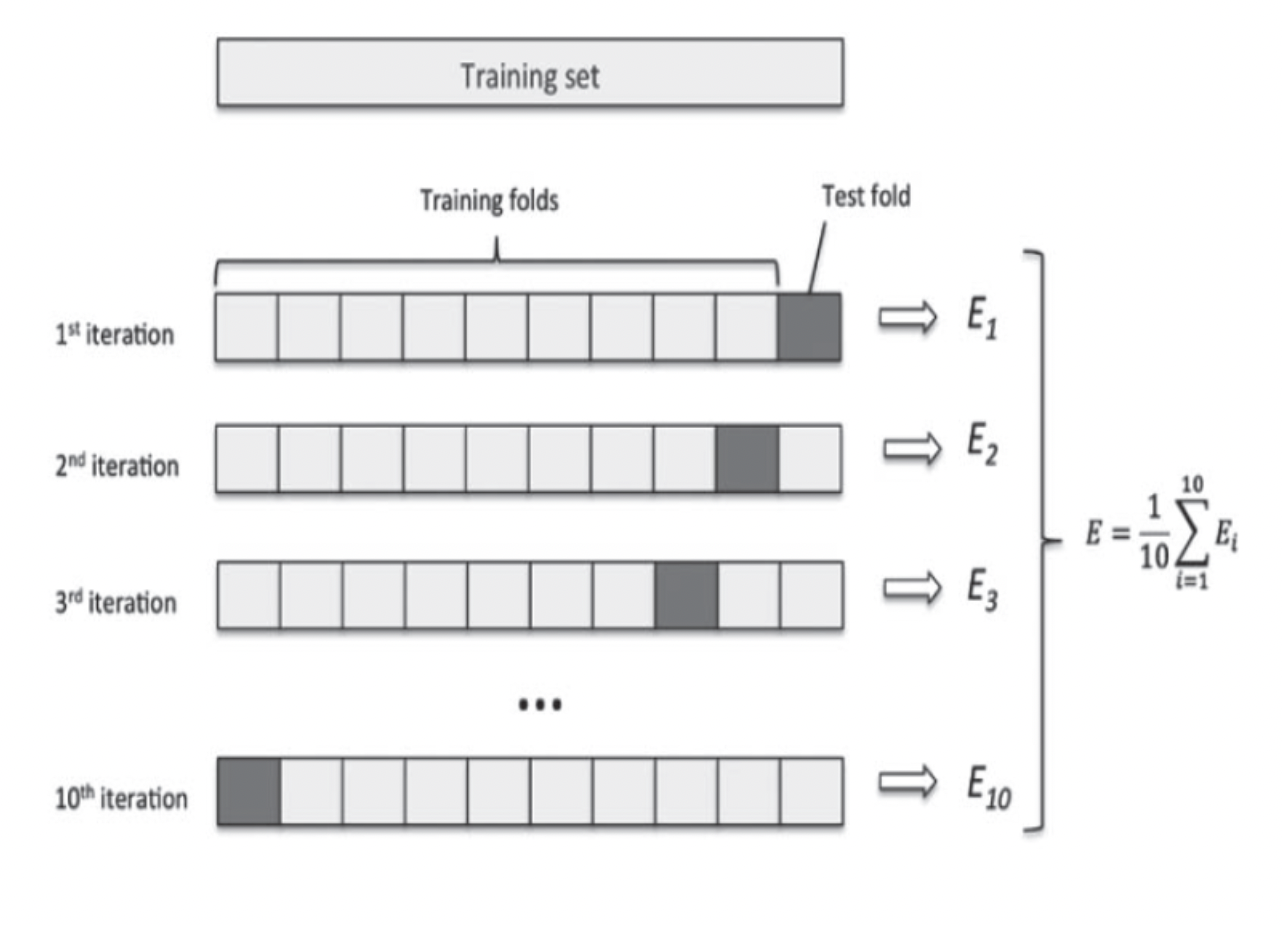

In [98]:
Image('kfold.png')

출처 : https://jinnyjinny.github.io/deep%20learning/2020/04/02/Kfold/

In [35]:
from sklearn.model_selection import KFold, StratifiedKFold

In [36]:
kf = KFold(n_splits = 5, random_state = 42, shuffle = True)

In [53]:
kf.split(b_X, b_y)

<generator object _BaseKFold.split at 0x7f8f142d5a50>

In [54]:
cv = cross_val_score(rf, b_X, b_y, cv = kf, scoring = 'neg_mean_absolute_error')

In [55]:
cv

array([-2.08291176, -2.09689109, -2.58248515, -2.20868317, -2.00142574])

In [56]:
cv.mean()

-2.1944793826441464

***

In [57]:
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

In [58]:
skf.split(X, y)

<generator object _BaseKFold.split at 0x7f8f144dbe40>

In [74]:
X.TotalCharges = X.TotalCharges.str.replace(' ', '0')

In [75]:
X.TotalCharges = X.TotalCharges.astype(float) 

In [76]:
X = pd.get_dummies(columns = X.columns[X.dtypes == object], data = X)

In [91]:
from lightgbm import LGBMClassifier

In [92]:
lgbm = LGBMClassifier(random_state = 42)

In [93]:
cv = cross_val_score(lgbm, X, y, cv = skf, scoring = 'accuracy')

In [94]:
cv.mean()

0.7945439020259373